<center>
    <h1>🎮 Video Game Sales Analysis EDA, Visualizations</h1>
</center>
<!--  and Sales Prediction Using Machine Learning Models -->

>[Import Necessary Packages](#scrollTo=QUYaglTj_uX4)

>[Data Collection & Loading](#scrollTo=bkZ20y9c_uX-)

>[Data Exploration and Analysis](#scrollTo=hrws3ECm_uYJ)

>>[Separate the Numerical And Categorical Features](#scrollTo=yyhwRY03_uYO)

>>>[Analysis for Categorical Features & check the most repetitive values.](#scrollTo=PD65M-hJ_uYQ)

>>[Data Cleaning and Remove NaN values.](#scrollTo=OteOBc6R_uYR)

>>>[Fill Missing Value in year Feature](#scrollTo=8h6uzfmq_uYb)

>>>[Fill missing value in Publisher Feature](#scrollTo=Dwpn-qMx_uYc)

>[Data Visualization](#scrollTo=3ixjT3xJ_uYf)

>>[Implementing LabelEncoder](#scrollTo=eQ7lo5H2_uY3)

>>[Splite the data into Train and Test set](#scrollTo=9zgfdSW4_uY7)

>[Model Selection](#scrollTo=sgoIRzOa_uY8)

>>[Implementing KNeighbor](#scrollTo=xzeBlUk4_uY-)

>>[Implementing Decision Tree Regressor](#scrollTo=uxESG0aV_uZA)

>>[Implementing RandomForest Regressor](#scrollTo=9GYvIsxG_uZB)

>>[Implementing SVM](#scrollTo=jCeZT67s_uZD)

>>[Implementing XGBoost](#scrollTo=0nhuT4cT_uZE)



## Import Necessary Packages

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Visualization Packages Importing
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from plotly import express as px
# import plotly.plotly as py
from plotly.offline import init_notebook_mode,iplot

# WordCloud Packages
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

<img align="center" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRjU3MyvLT2oT-7mMElUQzxHfj8q7y2iompRg&usqp=CAU" alt="Video Game Salary" width="100%"/>

## Data Collection & Loading

Read Data Using read_csv() method

In [3]:

df = pd.read_csv('data.csv')

Check some random data using `.sample()` method. It will pick the random number of records.

In [4]:
df.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1588,1590,Gegege no Kitarou 2: Youkai Gundan no Chousen,NES,1987.0,Role-Playing,Namco Bandai Games,0.00,0.00,1.25,0.00,1.25
6150,6152,Arcade Hits: Frisky Tom,PS,2002.0,Action,Hamster Corporation,0.16,0.11,0.00,0.02,0.28
8473,8475,Ar Nosurge: Ode to an Unborn Star,PS3,2014.0,Role-Playing,Tecmo Koei,0.05,0.04,0.06,0.02,0.16
9107,9109,Yu-Gi-Oh! Monster Capture GB,GB,2000.0,Role-Playing,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14
5381,5383,Alien's Return,2600,1982.0,Action,ITT Family Games,0.32,0.02,0.00,0.00,0.34


Get the first few records, then show them. Let's spend some time going through the data and the titles of its features.

In [5]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Similarly, inspect the last few records to have a better grasp of the dataset records.

In [6]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


The form of the dataset that we are utilizing may be seen here. The '.shape' attribute will produce a tuple containing (number of rows and columns).

In [7]:
df.shape

(16598, 11)

Use the '.columns' property to output the feature names. It will return a 'pandas Index' list with a 'dtype' of 'object'.

In [8]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

## Data Exploration and Analysis

Statistical information for all numerical features

In [9]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Overall information of datasets


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Check the missing data

In [11]:
df.isna().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

Calculate the percentage of missing data in each feature

In [12]:
(df.isna().sum() * 100) / df.shape[0]

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

### Separate the Numerical And Categorical Features


The code selects the columns from the DataFrame df that contain categorical (non-numeric) data and assigns them to a new DataFrame called categorical_df. It then displays the first few rows of categorical_df using the head() function.






In [13]:

categorical_df = df.select_dtypes('O')

categorical_df.head()

,Name,Platform,Genre,Publisher
0,Wii Sports,Wii,Sports,Nintendo
1,Super Mario Bros.,NES,Platform,Nintendo
2,Mario Kart Wii,Wii,Racing,Nintendo
3,Wii Sports Resort,Wii,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo


The code selects the columns from the DataFrame df that contain numerical (integer or floating-point) data and assigns them to a new DataFrame called numerical_df. It then displays the first few rows of numerical_df using the head() function.






In [14]:
numerical_df = df.select_dtypes(('int', 'float'))

numerical_df.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,2006.0,41.49,29.02,3.77,8.46,82.74
1,2,1985.0,29.08,3.58,6.81,0.77,40.24
2,3,2008.0,15.85,12.88,3.79,3.31,35.82
3,4,2009.0,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,11.27,8.89,10.22,1.00,31.37


The code extracts the column names of categorical features from the categorical_df DataFrame and assigns them to the categorical_features variable. It then prints the categorical feature column names. Next, it extracts the column names of numerical features from the numerical_df DataFrame and assigns them to the numerical_features variable. Finally, it prints the numerical feature column names.






In [15]:
categorical_features = categorical_df.columns
print(categorical_features)

print('-' * 60)

numerical_features = numerical_df.columns
print(numerical_features)

Index(['Name', 'Platform', 'Genre', 'Publisher'], dtype='object')
------------------------------------------------------------
Index(['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')


#### Analysis for Categorical Features & check the most repetitive values.

The code iterates over each categorical feature in the categorical_features list. For each feature, it prints a separator line, the column name, and a blank line. Then, it prints the five most common values and their respective counts in the df DataFrame for that categorical feature. Finally, it prints separator lines after each feature.






In [16]:
for category_name in categorical_features:
    print('-' * 50)
    print("Column Name: ", category_name)
    print(' ' * 50)

    print(df[category_name].value_counts().head())

    print('-' * 50)
    print('-' * 50)

--------------------------------------------------
Column Name:  Name
                                                  
Name
Need for Speed: Most Wanted    12
Ratatouille                     9
FIFA 14                         9
LEGO Marvel Super Heroes        9
Madden NFL 07                   9
Name: count, dtype: int64
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Column Name:  Platform
                                                  
Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: count, dtype: int64
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Column Name:  Genre
                                                  
Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Name: count, dty

### Data Cleaning and Remove NaN values.

Calculate the number of missing data in each column

In [17]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

The code generates a summary statistics description of the 'Year' and 'Publisher' columns from the DataFrame df, including count, unique values, top value, and frequency for each column.






In [18]:
df[['Year', 'Publisher']].describe(include='all')

,Year,Publisher
count,16327.000000,16540
unique,NaN,578
top,NaN,Electronic Arts
freq,NaN,1351
mean,2006.406443,NaN
std,5.828981,NaN
min,1980.000000,NaN
25%,2003.000000,NaN
50%,2007.000000,NaN
75%,2010.000000,NaN


#### Fill Missing Value in year Feature

The code computes summary statistics for the 'Year' and 'Publisher' columns of the DataFrame df, including count, unique values, top value, and frequency. The include='all' parameter ensures that both numeric and non-numeric columns are included in the description.






In [19]:
df.Year = df.Year.fillna(df.Year.mean())

The code converts the 'Year' column in the DataFrame df to the integer data type using the astype() function with the argument 'int32'. It then displays the modified 'Year' column.






In [20]:
df.Year = df.Year.astype('int32')
df.Year

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16593    2002
16594    2003
16595    2008
16596    2010
16597    2003
Name: Year, Length: 16598, dtype: int32

#### Fill missing value in Publisher Feature

The code computes the frequency of each unique value in the 'Publisher' column of the DataFrame df and expresses it as a normalized percentage, indicating the proportion of each value in the column.






In [21]:
df.Publisher.value_counts(normalize=True)

Publisher
Electronic Arts                 0.081681
Activision                      0.058948
Namco Bandai Games              0.056348
Ubisoft                         0.055683
Konami Digital Entertainment    0.050302
                                  ...   
Warp                            0.000060
New                             0.000060
Elite                           0.000060
Evolution Games                 0.000060
UIG Entertainment               0.000060
Name: proportion, Length: 578, dtype: float64

The code fills missing values in the 'Publisher' column of the DataFrame df by replacing them with the most frequent value (mode) of the column, which is accessed using df.Publisher.mode()[0].






In [22]:
df.Publisher = df.Publisher.fillna(df.Publisher.mode()[0])

The code displays the data types of the 'Publisher' and 'Year' columns in the DataFrame df.






In [23]:
df[['Publisher','Year']].dtypes

Publisher    object
Year          int32
dtype: object

## Data Visualization

Showing top 10 Publisher who has published many video games by viewing bar plots

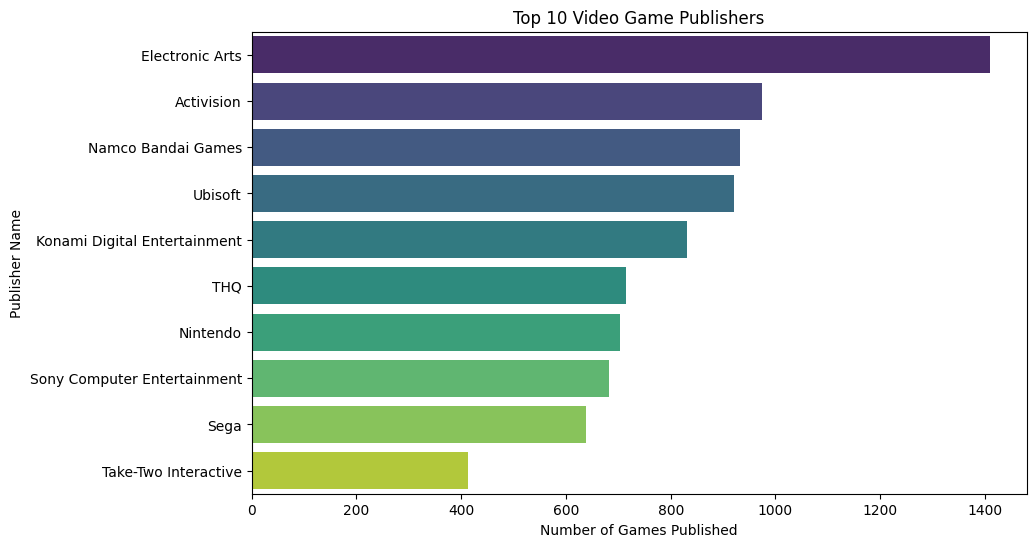

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the video game data

# Get the top 10 publishers
top_10_publishers = df['Publisher'].value_counts().head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_publishers.values, y=top_10_publishers.index, palette='viridis')
plt.title('Top 10 Video Game Publishers')
plt.xlabel('Number of Games Published')
plt.ylabel('Publisher Name')
plt.show()


Showing top 10 Video Games Genres that has most playing video games using bar and scatter plots

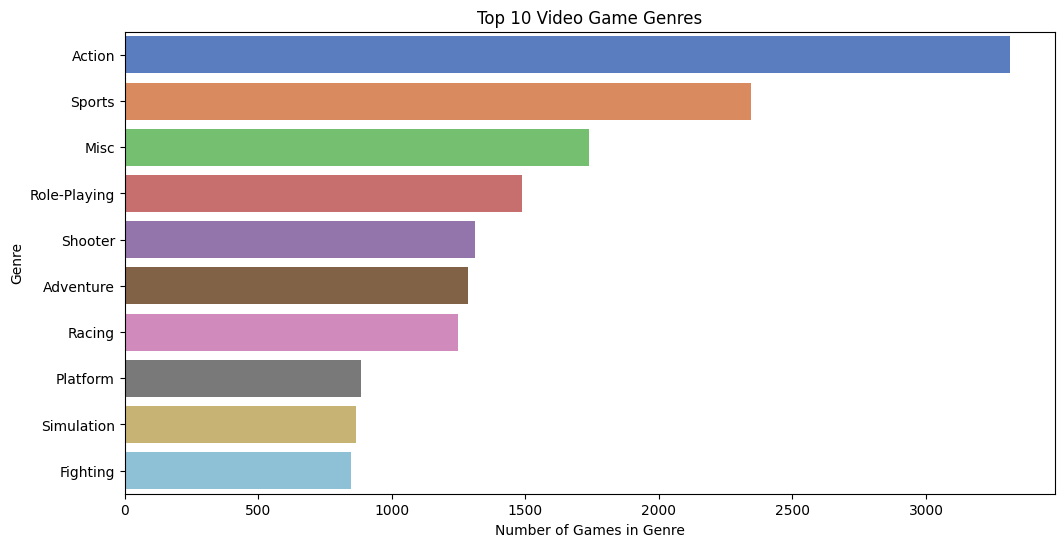

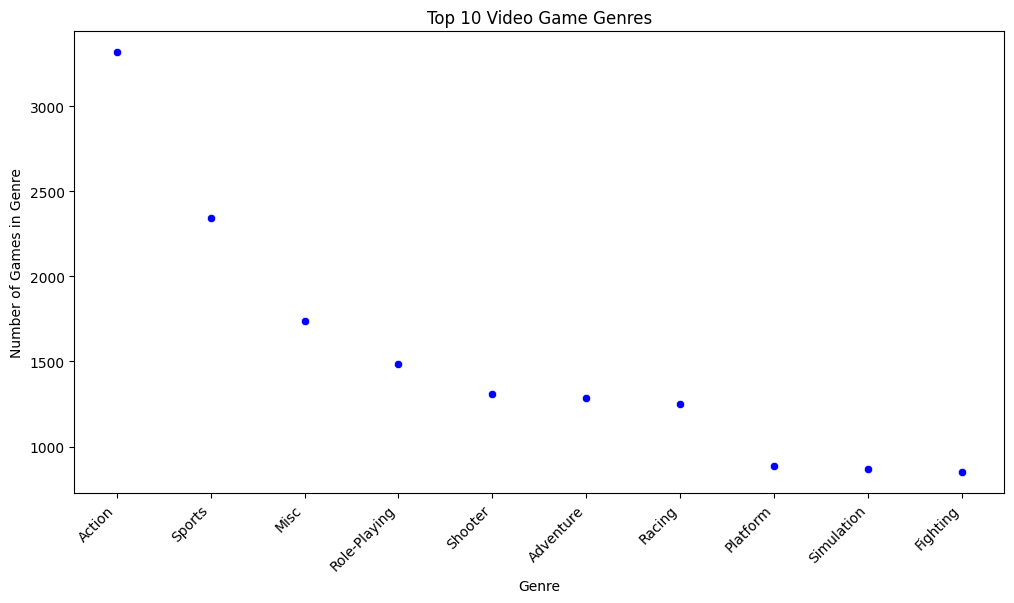

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the video game data

# Get the top 10 genres
top_10_genres = df['Genre'].value_counts().head(10)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='muted')
plt.title('Top 10 Video Game Genres')
plt.xlabel('Number of Games in Genre')
plt.ylabel('Genre')
plt.show()

# Plot a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=top_10_genres.index, y=top_10_genres.values, color='blue')
plt.title('Top 10 Video Game Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Games in Genre')
plt.xticks(rotation=45, ha='right')
plt.show()


Showing top 10 Playing Video games Platforms using line plots

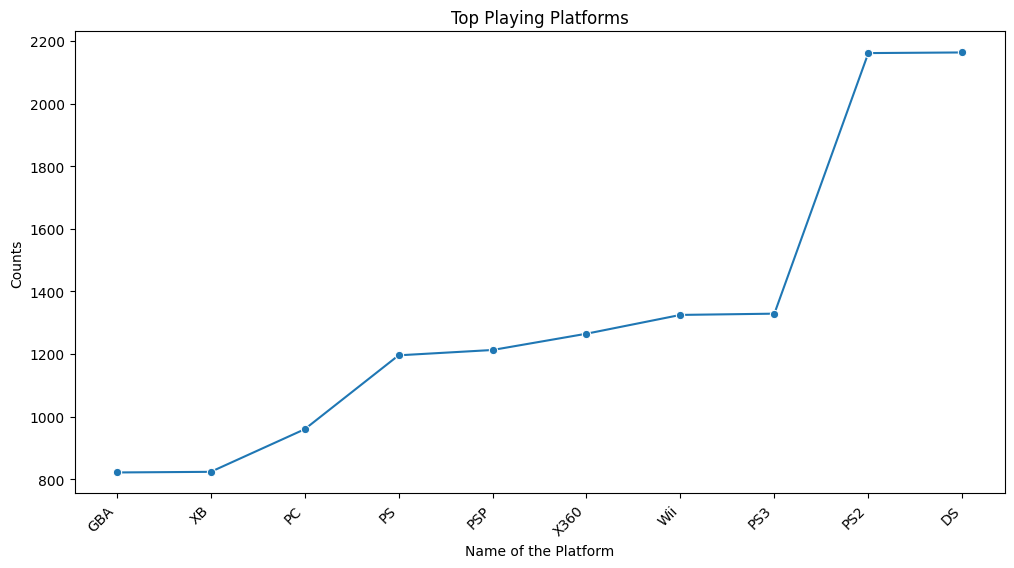

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the video game data

# Get the top 10 platforms
top_10_platform = df['Platform'].value_counts().sort_values().tail(10)

# Plot a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=top_10_platform.index, y=top_10_platform.values, marker='o')
plt.title('Top Playing Platforms')
plt.xlabel('Name of the Platform')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.show()


The code displays the first few rows of the DataFrame df, providing a preview of the data.






In [31]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Displaying total sales (in millions) for North America, Europe, Japan, and other countries by year.

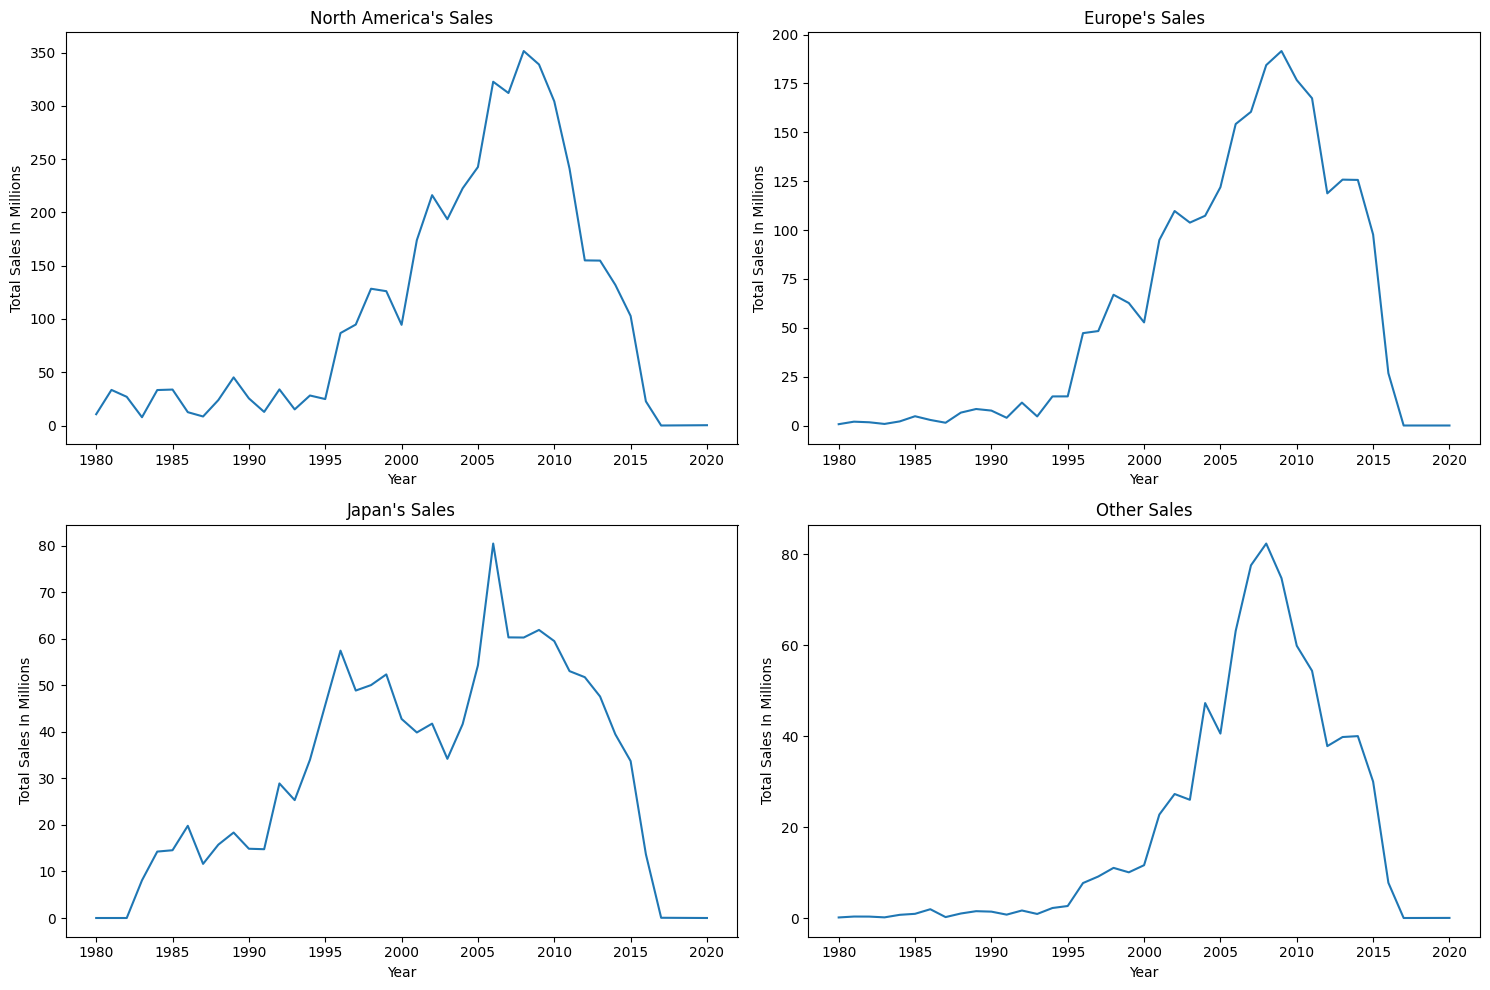

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the video game data

year_wise_sales = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot for North America
sns.lineplot(x='Year', y='NA_Sales', data=year_wise_sales, ax=axes[0, 0])
axes[0, 0].set_title("North America's Sales")
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Total Sales In Millions')

# Plot for Europe
sns.lineplot(x='Year', y='EU_Sales', data=year_wise_sales, ax=axes[0, 1])
axes[0, 1].set_title("Europe's Sales")
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Total Sales In Millions')

# Plot for Japan
sns.lineplot(x='Year', y='JP_Sales', data=year_wise_sales, ax=axes[1, 0])
axes[1, 0].set_title("Japan's Sales")
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Total Sales In Millions')

# Plot for Other Sales
sns.lineplot(x='Year', y='Other_Sales', data=year_wise_sales, ax=axes[1, 1])
axes[1, 1].set_title("Other Sales")
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Total Sales In Millions')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Countries' Average Sales (in Millions) by Year

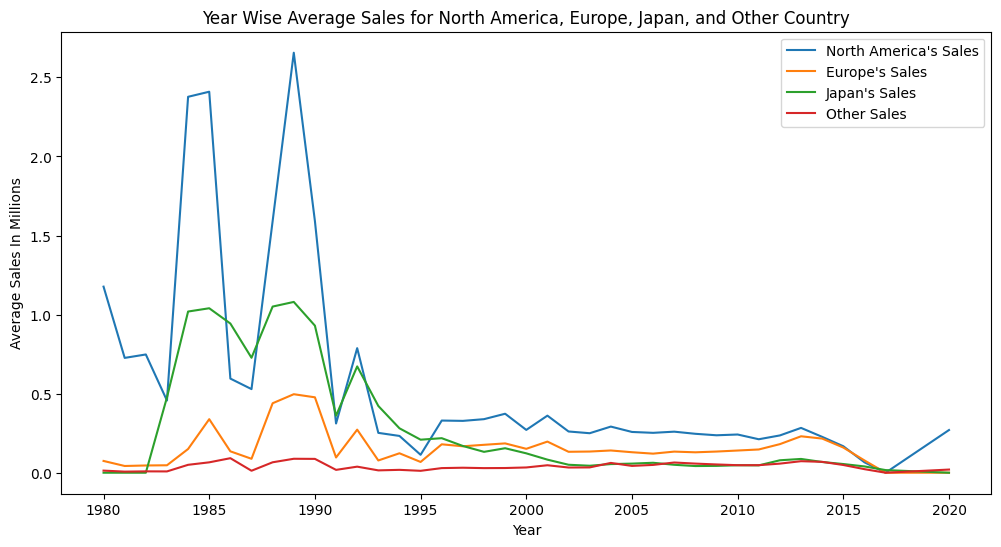

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the video game data

year_wise_sales = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean().reset_index()

# Create subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Plot for North America
sns.lineplot(x='Year', y='NA_Sales', data=year_wise_sales, label="North America's Sales", ax=ax)

# Plot for Europe
sns.lineplot(x='Year', y='EU_Sales', data=year_wise_sales, label="Europe's Sales", ax=ax)

# Plot for Japan
sns.lineplot(x='Year', y='JP_Sales', data=year_wise_sales, label="Japan's Sales", ax=ax)

# Plot for Other Sales
sns.lineplot(x='Year', y='Other_Sales', data=year_wise_sales, label="Other Sales", ax=ax)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Average Sales In Millions')
ax.set_title('Year Wise Average Sales for North America, Europe, Japan, and Other Country')

# Show legend
ax.legend()

# Show the plot
plt.show()


Displaying Yearly Global Sales (in Millions) Using Scatter Plot with Genres and Game Name

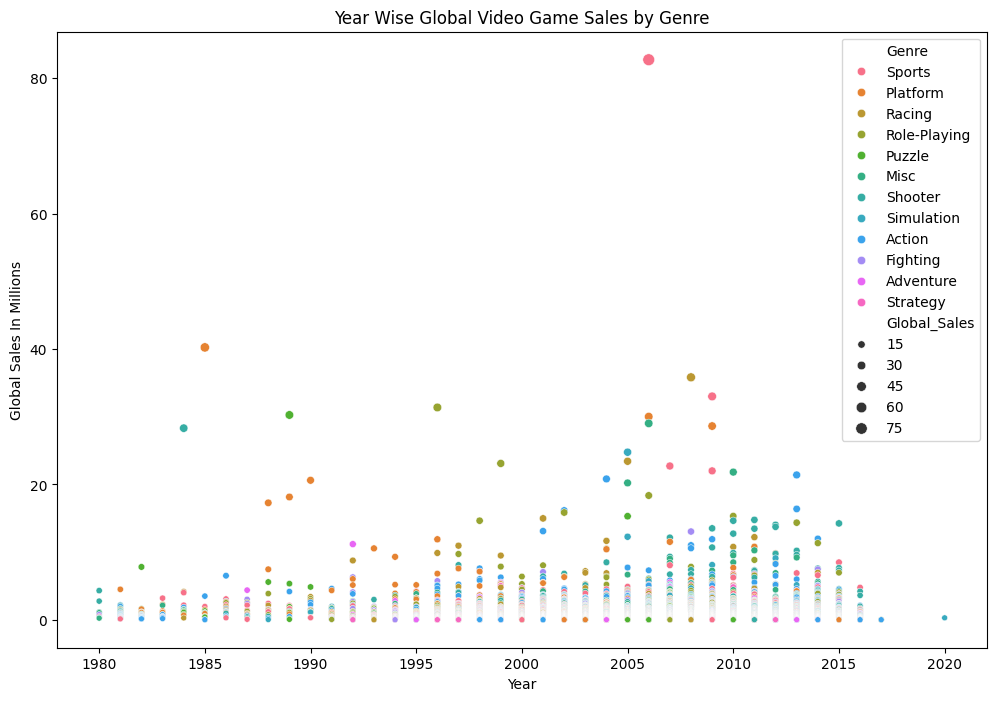

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the video game data

# Create subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Plot scatter plot
sns.scatterplot(x='Year', y='Global_Sales', hue='Genre', size='Global_Sales', data=df, ax=ax)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Global Sales In Millions')
ax.set_title('Year Wise Global Video Game Sales by Genre')

# Show legend
ax.legend()

# Show the plot
plt.show()


Using a sunburst graph, the top ten video game sales by genre, publisher, and platform for each country are shown.

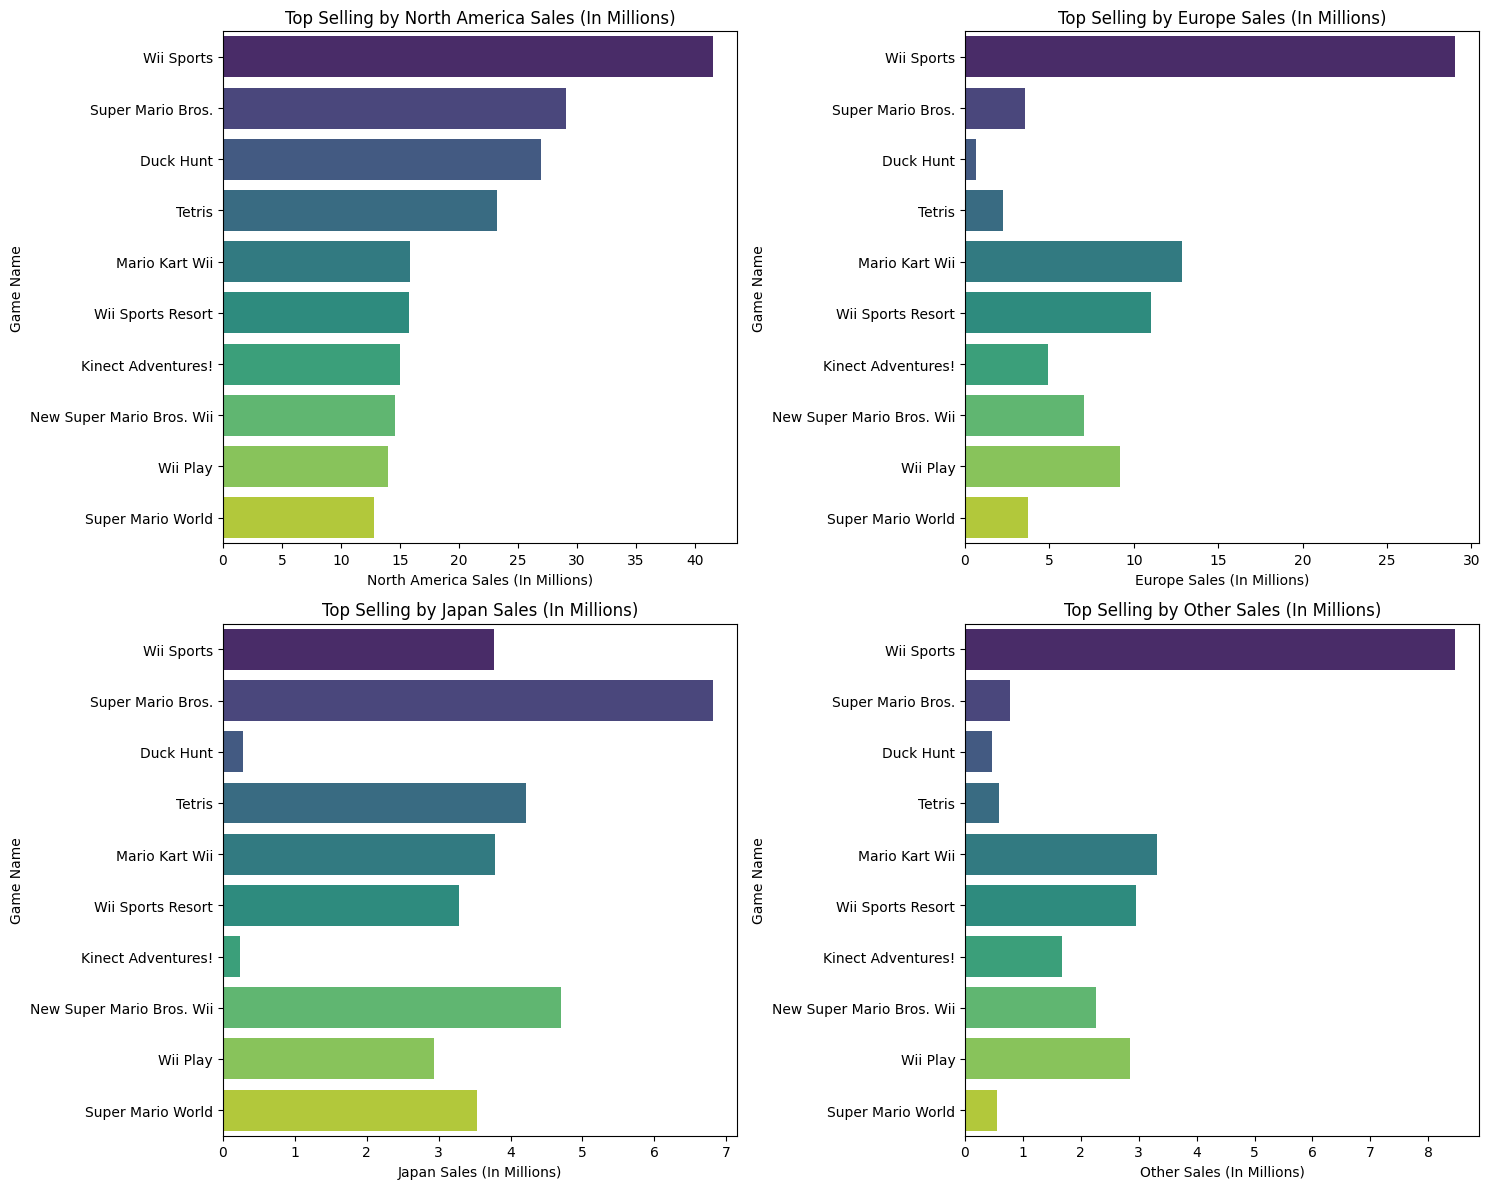

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the video game data

top_sales = df.sort_values(by=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], ascending=False).head(10)

# Dictionary for column names and corresponding titles
dicts_name = {
    'NA_Sales': "North America Sales (In Millions)",
    'EU_Sales': "Europe Sales (In Millions)",
    'JP_Sales': "Japan Sales (In Millions)",
    'Other_Sales': "Other Sales (In Millions)",
}

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

for i, (key, title) in enumerate(dicts_name.items()):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    # Plot treemap
    sns.barplot(x=key, y='Name', data=top_sales, ax=ax, palette='viridis')
    ax.set_title('Top Selling by ' + title)
    ax.set_xlabel(title)
    ax.set_ylabel('Game Name')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Showing the most often occurring term in the dataset for all Categorical variables such as 'Name,' 'Publisher,' 'Platform,' and 'Genre.'

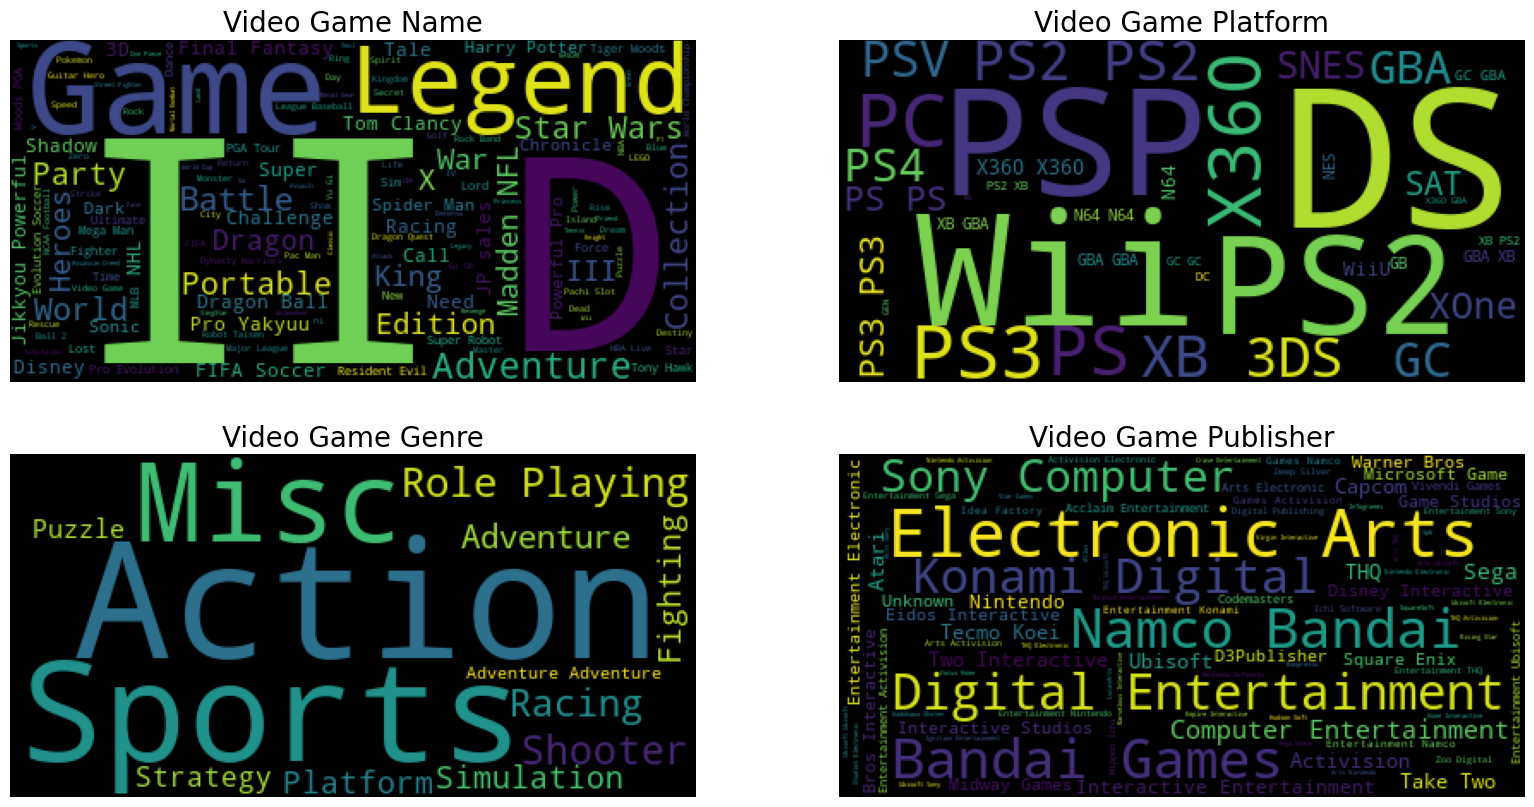

In [44]:

global_sales = df.sort_values(by='Other_Sales', ascending=False)

# plt.subplot(1, 2, 1)


fig = plt.figure(figsize=(17,17))


for index, col,  in enumerate(categorical_features):

    plt.subplot(len(categorical_features), 2, index + 1)

    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
        stopwords=stopwords
    ).generate(" ".join(global_sales[col]))

    # Show WordCloud Image


    plt.imshow(wordcloud)
    plt.title("Video Game " + col, fontsize=20)
    plt.axis('off')
    plt.tight_layout(pad=3)

plt.show()

The correlation for the numerical characteristic is displayed.

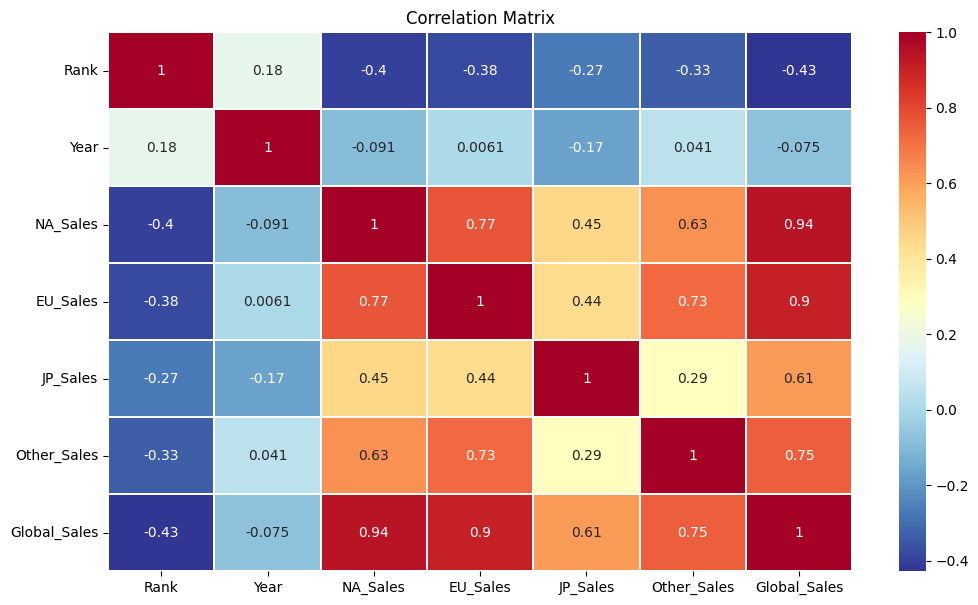

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the video game data

# Exclude non-numeric columns
numeric_df = df.select_dtypes(include='number')

corr_ = numeric_df.corr()

plt.figure(figsize=(12, 7))
sns.heatmap(corr_, annot=True, linewidths=.2, cmap='RdYlBu_r')
plt.title('Correlation Matrix')
plt.show()


In [49]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Implementing LabelEncoder

In [50]:
from sklearn.preprocessing import LabelEncoder

Define the LabelEncoder

In [51]:
data = df.copy()

le = LabelEncoder()

The code encodes the categorical columns 'Platform' and 'Genre' in the DataFrame df using a LabelEncoder (le), replacing the categorical values with numerical labels.






In [52]:
feature = ["Platform", "Genre"]

for col in feature:
    data[col] = le.fit_transform(df[col])

Let's create train and target feature for train and test splites

In [53]:
X = data[['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values

y = data['Global_Sales'].values

In [54]:
X[:5], y[:5]

(array([[26.  , 10.  , 41.49, 29.02,  3.77,  8.46],
        [11.  ,  4.  , 29.08,  3.58,  6.81,  0.77],
        [26.  ,  6.  , 15.85, 12.88,  3.79,  3.31],
        [26.  , 10.  , 15.75, 11.01,  3.28,  2.96],
        [ 5.  ,  7.  , 11.27,  8.89, 10.22,  1.  ]]),
 array([82.74, 40.24, 35.82, 33.  , 31.37]))

### Splite the data into Train and Test set

In [55]:
from sklearn.model_selection import train_test_split

Split the data into training and testing

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=45)

Print the shape of X_train, y_train, X_test, y_test

In [57]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13278, 6), (13278,), (3320, 6), (3320,))

## Model Selection

In [58]:
from sklearn.linear_model import LinearRegression

# Import r2 score for Calculation
from sklearn.metrics import r2_score

Define the Linear Regression model and fit the data through it

In [59]:
lr = LinearRegression()

lr.fit(X_train, y_train)

pred = lr.predict(X_test)

r2_MultiLinear = r2_score(y_test,pred)

The code prints the value of the coefficient of determination (R-squared) for a multilinear regression model (r2_MultiLinear). It also prints the score of the linear regression model (lr) on the test data, which is typically the R-squared value as well.






In [60]:
print(r2_MultiLinear)
print(lr.score(X_test, y_test))

0.9999928402231678
0.9999928402231678


### Implementing KNeighbor

In [61]:
from sklearn.neighbors import KNeighborsRegressor

The code calculates the R-squared scores for different values of k in K-Nearest Neighbors regression. It iterates over a range of k values, trains a K-Nearest Neighbors regressor with each k value, makes predictions on the test data, and stores the R-squared scores in a list (scores_list).






In [62]:
kRange = range(1,15,1)

scores_list = []
for i in kRange:
    regressor_knn = KNeighborsRegressor(n_neighbors = i)

    regressor_knn.fit(X_train,y_train)
    pred = regressor_knn.predict(X_test)

    scores_list.append(r2_score(y_test,pred))

The code plots the R-squared scores obtained from K-Nearest Neighbors regression as a function of the number of neighbors (k). It sets the x-axis ticks to correspond to the range of k values, and labels the x-axis as "Neighbor Number" and the y-axis as "r2_Score of KNN" before displaying the plot.






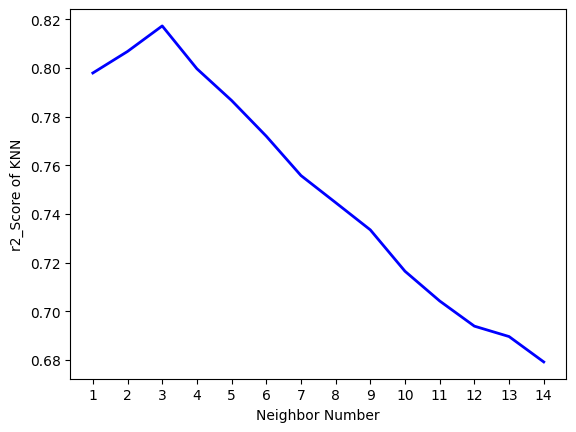

In [63]:
plt.plot(kRange, scores_list, linewidth=2, color='blue')
plt.xticks(kRange)

plt.xlabel('Neighbor Number')
plt.ylabel('r2_Score of KNN')
plt.show()

The code trains a K-Nearest Neighbors (KNN) regression model on the training set using 3 neighbors, makes predictions on the test set, calculates the R-squared score between the predicted and actual values, and prints the R-squared score.






In [64]:

regressor_knn = KNeighborsRegressor(n_neighbors = 3)

regressor_knn.fit(X_train,y_train)
pred = regressor_knn.predict(X_test)

r2_knn = r2_score(y_test,pred)
print(r2_knn)

0.8172284828082859


### Implementing Decision Tree Regressor

Define the Decision Tree Regression model

In [65]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=32)

Fit the data through model and predict on test set

In [66]:
dtr.fit(X_train, y_train)

pred = dtr.predict(X_test)

print(r2_score(y_test, pred))

0.8253463322258714


### Implementing RandomForest Regressor

Define the Random Forest Regressor model

In [67]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state= 10)

Fit the model and test on test set

In [68]:
rfr.fit(X_train, y_train)

pred = rfr.predict(X_test)

print(r2_score(y_test, pred))

0.8250021287322872


### Implementing SVM

The code imports the Support Vector Regression (SVR) module from scikit-learn and initializes two SVR models with different kernel functions: linear and radial basis function (rbf).






In [69]:
from sklearn.svm import SVR

svr_linear = SVR(kernel='linear')

svr_rbf = SVR(kernel='rbf')

The code fits the SVR models with the training data using linear and radial basis function (rbf) kernels, respectively. It then makes predictions on the test data using these models and prints the R2 scores for the linear and rbf predictions.






In [70]:
svr_linear.fit(X_train, y_train)
svr_rbf.fit(X_train, y_train)

pred_linear = svr_linear.predict(X_test)
pred_rbf = svr_rbf.predict(X_test)

print(r2_score(y_test, pred_linear))
print(r2_score(y_test, pred_rbf))

0.9983709152995387
0.4836465140034072


### Implementing XGBoost

Define the XGBoost model

In [72]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

Fit the model and predict on test set

In [73]:
xgb.fit(X_train, y_train)

pred = xgb.predict(X_test)

print(r2_score(y_test, pred))

0.7975450400864107
